# Modules

Python has a way to put definitions in a file so they can easily be reused. 
Such files are called a modules. You can define your own module (for instance see [here](https://docs.python.org/3/tutorial/modules.html)) how to do this but in this course we will only discuss how to use
existing modules as they come with python as the [python standard library](https://docs.python.org/3.9/tutorial/stdlib.html?highlight=library) or as third party libraries as they for instance are distributed 
through [anaconda](https://www.anaconda.com/) or your Linux distribution or you can install trough `pip` or from source. 

Definitions from a module can be imported into your jupyter notebook, your python script, and into other modules.
The module is imported using the import statement. Here we import the mathematics library from the python standard library:

In [1]:
import math

You can find a list of the available functions, variables and classes using the `dir` method:

In [2]:
dir(math)

['__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'acos',
 'acosh',
 'asin',
 'asinh',
 'atan',
 'atan2',
 'atanh',
 'ceil',
 'copysign',
 'cos',
 'cosh',
 'degrees',
 'e',
 'erf',
 'erfc',
 'exp',
 'expm1',
 'fabs',
 'factorial',
 'floor',
 'fmod',
 'frexp',
 'fsum',
 'gamma',
 'gcd',
 'hypot',
 'inf',
 'isclose',
 'isfinite',
 'isinf',
 'isnan',
 'ldexp',
 'lgamma',
 'log',
 'log10',
 'log1p',
 'log2',
 'modf',
 'nan',
 'pi',
 'pow',
 'radians',
 'sin',
 'sinh',
 'sqrt',
 'tan',
 'tanh',
 'tau',
 'trunc']

A particular function (or class or constant) can be called in the form `<module name>.<function name>`:

In [3]:
math.exp(1)

2.718281828459045

Documentation of a function (or class or constant) can be obtained using the `help` function (if the developer has written it): 

In [4]:
help(math.exp)

Help on built-in function exp in module math:

exp(...)
    exp(x)
    
    Return e raised to the power of x.



You can also import a specific function (or a set of functions) so you can directly use them without a prefix: 

In [5]:
from cmath import exp
exp(1j)

(0.5403023058681398+0.8414709848078965j)

In python terminology that means that  - in this case - the `exp` function  is imported into the main *name space*.
This needs to be applied with care as existing functions (or class definition) with identical names are overwritten.
For instance the `math` and the `cmath` module have a function `exp`. Importing both will create a problem 
in the main name space. 

If you are conficdent in what you are doing you can import all functions and class definitions into the main name space:

In [6]:
from cmath import *
cos(1.)

(0.5403023058681398-0j)

Modules can contain submodules. The functions are then 
accessed `<module name>.<sub-module name>.<function name>`:

In [7]:
import os
os.path.exists('FileHandling.ipynb')

False

In these cases it can be useful to use an alias to make the code easier to read:

In [8]:
import os.path as pth
pth.exists('FileHandling.ipynb')

False

# More on printing

Python provides a powerful way of formatting output using formatted string.
Basicly the ideas is that in a formatted string marked by a leading 'f' variable
names are replaced by the corresponding variable values. Here comes an example:

In [9]:
x, y = 2.124, 3

In [10]:
f"the value of x is {x} and of y is {y}."

'the value of x is 2.124 and of y is 3.'

python makes guesses on how to format the value of the variable but you can also be specific if values should be shown in a specific way. here we want to show `x` as a floating point numbers with a scientific number representation indicated by `e` and `y` to be shown as an integer indicated by `d`: 

In [11]:
f"x={x} x={x:10f} x={x:e} y={y:d}"

'x=2.124 x=  2.124000 x=2.124000e+00 y=3'

More details on [Formatted string literals](https://docs.python.org/3.7/reference/lexical_analysis.html#index-24)

Formatted strings are used to prettify output when printing:

In [12]:
print(f"x={x:10f}")
print(f"y={y:10d}")


x=  2.124000
y=         3


An alternative way of formatting is the `format` method of a string. You can use the 
positional arguments:

In [13]:
guest='John'
'Hi {0}, welcome to {1}!"'.format(guest, 'Brisbane')

'Hi John, welcome to Brisbane!"'

Or keyword arguments:

In [14]:
'Hi {guest}, welcome to {place}!'.format(guest='Mike', place='Brisbane')

'Hi Mike, welcome to Brisbane!'

and a combination of positional arguments and keyword arguments:

In [15]:
'Hi {guest}, welcome to {1}! Enjoy your stay for {0} days.'.format(10, 'Brisbane',  guest="Bob")
                                                   

'Hi Bob, welcome to Brisbane! Enjoy your stay for 10 days.'

You can also introduce some formatting on how values are represented:

In [16]:
'Hi {guest}, welcome to {0}! Enjoy your stay for {1:+10d} days.'.format('Brisbane', 10, guest="Bob")

'Hi Bob, welcome to Brisbane! Enjoy your stay for        +10 days.'

More details in particular for formating numbers are found [here](https://docs.python.org/3.9/library/string.html).

# Writing and Reading files

To open a file for reading or writing use the `open` function. `open()`
returns a file object, and is most commonly used with two arguments: open(filename, mode).

In [17]:
outfile=open("myRicker.csv", 'wt')

It is commonly used with two arguments: `open(filename, mode)` where the `mode` takes the values:
- `w` open for writing. An existing file with the same name will be erased.
- `a` opens the file for appending; any data written to the file is automatically added to the end. 
- `r` opens the file for both reading only.
By default text mode `t` is used that means, you read and write strings from and to the file, which are encoded in a specific encoding. `b` appended to the mode opens the file in binary mode: now the data is read and written in the form of bytes objects. 

We want to write some code that writes the `Ricker` wavelet of a period of
`length` and given frequency `f` to the files `myRicker.csv` in the comma-separated-value (CSV) format. The time is incremented by `dt`.  

In [18]:
length=0.128
f=25
dt=0.001

In [19]:
def ricker(t, f):
    """
    return the value of the Ricker wavelet at time t for peak frequency f
    """
    r = (1.0 - 2.0*(math.pi**2)*(f**2)*(t**2)) * math.exp(-(math.pi**2)*(f**2)*(t**2))
    return r

In [20]:
t=-length/2
n=0
while t < length/2:
    outfile.write("{0}, {1}\n".format(t, ricker(t, f)))
    t+=dt
    n+=1

print("{} records writen to {}.".format(n, outfile.name))

128 records writen to myRicker.csv.


You can download/open the file ['myRicker.csv'](myRicker.csv).
** Notice ** There is an extra new line character `\n` at the of string in the `write` statement. This makes sure that separate rows can be identified in the file.

Don't forget to close the file at the end:

In [21]:
outfile.close()

Now we want to read this back. First we need to open the file for reading:

In [22]:
infile=open("myRicker.csv", 'r')

We then can read the entire file as a string:

In [23]:
content=infile.read()
content[0:100]

'-0.064, -5.27136925728684e-10\n-0.063, -1.1173524267190238e-09\n-0.062, -2.3381171400259564e-09\n-0.061'

In some cases it is more easier to read the file row-by-row. First we need to move back to the beginning of the file:

In [24]:
infile.seek(0)

0

Now we read the file line by line. Each line is split into the time and wavelet value which are 
collected as floats in two lists `times` and `ricker`:

In [25]:
infile.seek(0)
line=infile.readline()
times=[]
ricker=[]
n=0
while len(line)>0:
    a, b=line.split(',')
    times.append(float(a))
    ricker.append(float(b))
    line=infile.readline()
    n+=1
print("{} records read from {}.".format(n, infile.name))

128 records read from myRicker.csv.


Notice that the end of file is reached when the read line is empty (len(line)=0). Then the loop is exited.

In [26]:
time[:10]

SyntaxError: invalid syntax (<unknown>, line 1)

# JSON Files


JSON files (JavaScript Object Notation) is an open-standard file format that uses human-readable text to transmit data objects consisting of dictionaries and lists. It is a very common data format, with a diverse range of applications in particular when exchanging data between web browsers and web services.

A typical structure that is saved in JSON files are combinations of lists and dictionaries 
with string, integer and float entries. For instance

In [27]:
course = [ { "name": "John", "age": 30, "id" : 232483948} ,
           { "name": "Tim", "age": 45, "id" : 3246284632} ]  

In [28]:
course

[{'age': 30, 'id': 232483948, 'name': 'John'},
 {'age': 45, 'id': 3246284632, 'name': 'Tim'}]

The `json` module provides the necessary functionality to write `course` into file, here `course.json`:

In [29]:
import json
json.dump(course, open("course.json", 'w'), indent=4)

You can access the [course.json](course.json). Depending on your web browser the file is identified as JSON file
and presented accordingly. 

We can easily read the file back using the `load` method:

In [30]:
newcourse=json.load(open("course.json", 'r'))

This recovers the original list+dictionary structure:

In [31]:
newcourse

[{'age': 30, 'id': 232483948, 'name': 'John'},
 {'age': 45, 'id': 3246284632, 'name': 'Tim'}]

We can recover the names of the persons in the course:

In [32]:
[ p['name'] for p in newcourse ]

['John', 'Tim']

We can add new person to `newcourse`:

In [33]:
newcourse.append({'age': 29, 'name': 'Jane', 'studentid': 2643746328})
newcourse

[{'age': 30, 'id': 232483948, 'name': 'John'},
 {'age': 45, 'id': 3246284632, 'name': 'Tim'},
 {'age': 29, 'name': 'Jane', 'studentid': 2643746328}]

# Visualization

We would like to plot the Ricker wavelet. 
The `matplotlib` library provides a convenient, flexible and powerful tool for visualization at least for 2D data sets. Here we can give only a very brief introduction with more functionality being presented as the course evolves. 
For a comprehensive documentation and list of examples we refer to the [matplotlib web page](https://matplotlib.org).

Here we use the `matplotlib.pyplot` library which is a collection of command style functions but there 
is also a more general API which gives a reacher functionality:

In [34]:
#%matplotlib notebook
import matplotlib.pyplot as plt

It is very easy to plot data point we have read:

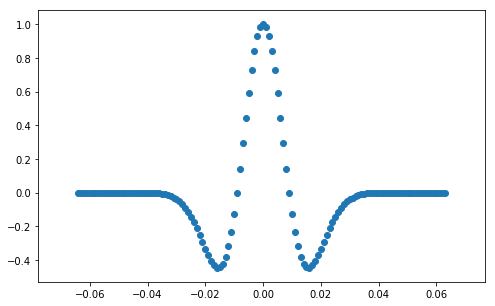

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(times, ricker)

We can also plot this as a function rather than just data point:

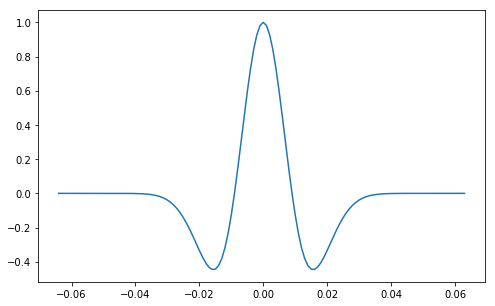

In [36]:
plt.figure(figsize=(8,5))
plt.plot(times, ricker)

Let's use proper labeling of the horizontal axis:

Text(0.5,0,'time [sec]')

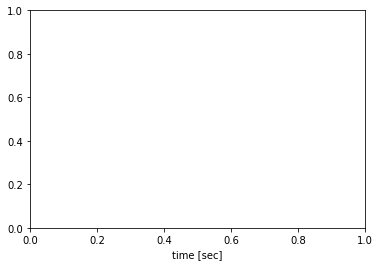

In [37]:
plt.xlabel('time [sec]')

and for the vertical axis:

Text(0,0.5,'aplitude')

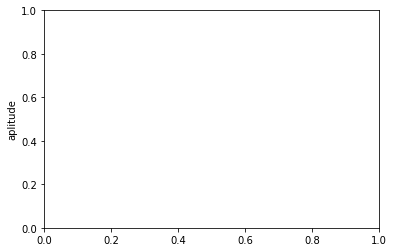

In [38]:
plt.ylabel('aplitude')

And maybe a title:

Text(0.5,1,'Ricker wavelet for frequency f = 25 hz')

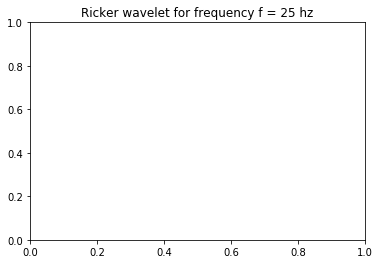

In [39]:
plt.title('Ricker wavelet for frequency f = 25 hz')

We can also change the line style, eg. red doted line:

Text(0,0.5,'aplitude')

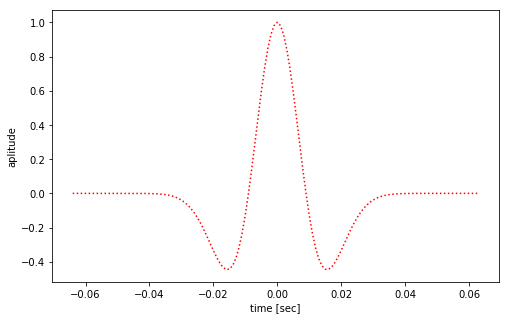

In [40]:
plt.figure(figsize=(8,5))
plt.plot(times, ricker, 'r:')
plt.xlabel('time [sec]')
plt.ylabel('aplitude')

We can put different data sets or representations into the plot:  

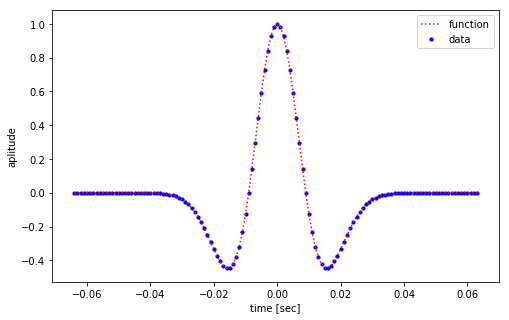

In [44]:
plt.figure(figsize=(8,5))
plt.plot(times, ricker, 'r:', label="function")
plt.scatter(times, ricker, c='b', s=10, label="data")
plt.xlabel('time [sec]')
plt.ylabel('aplitude')
plt.legend()

You can also add grid line to make the plot easier to read: 

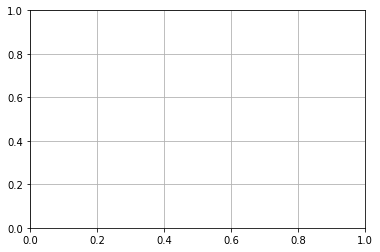

In [45]:
plt.grid(True)

Save the plot to a file:

In [46]:
plt.savefig("ricker.png")

see [ricker.png](ricker.png) for the file.